In [1]:
import numpy as np
from IPython.display import clear_output


def generate_two_questions(rnd):
    range_1 = np.arange(1, 8)
    range_2 = np.arange(8, 15)
    return rnd.choice(range_1), rnd.choice(range_2)


rnd = np.random.default_rng(seed=0)

In [2]:
while True:
    x = input()
    if x == "0":
        break
    print(generate_two_questions(rnd), flush=True)
    clear_output(wait=True)

(6, 12)


In [6]:
names = [
    "Белков Алексей",
    "Белков Арсений",
    "Зайченкова Екатерина",
    "Корчагин Сергей",
    "Кулакова Анна",
    "Малеванный Всеволод",
    "Плохотнюк Всеволод",
    "Сабанцев Лев",
]
names = ["Белков", "Зайченкова", "Сабанцев"]

In [7]:
rnd.shuffle(names)
names

['Сабанцев', 'Зайченкова', 'Белков']

## Вариант 2 задача 3

In [2]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

mean = 6
analitical_prob = (np.exp(1 / mean) - 1) / (2 * np.exp(1 / mean) - 1)
analitical_prob

0.1330869899697324

In [36]:
def get_prob_estimates(N):
    rnd = np.random.default_rng(seed=0)
    size = 1000000
    probs = []
    for _ in tqdm(range(N)):
        xi = rnd.exponential(scale=mean, size=size)
        mu = np.random.geometric(p=0.5, size=size) - 1
        empirical_prob = np.mean(xi < mu)
        probs.append(empirical_prob)
    return probs

100%|██████████| 10/10 [00:00<00:00, 18.76it/s]


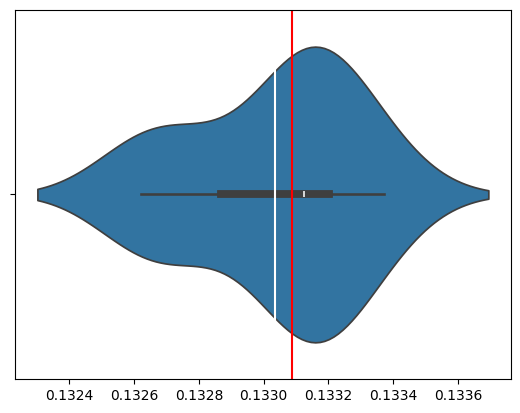

In [41]:
data = get_prob_estimates(10)
sns.violinplot(x=data)
plt.axvline(x=analitical_prob, color="r")
plt.axvline(x=np.mean(data), color="w")

100%|██████████| 1000/1000 [01:17<00:00, 12.84it/s]


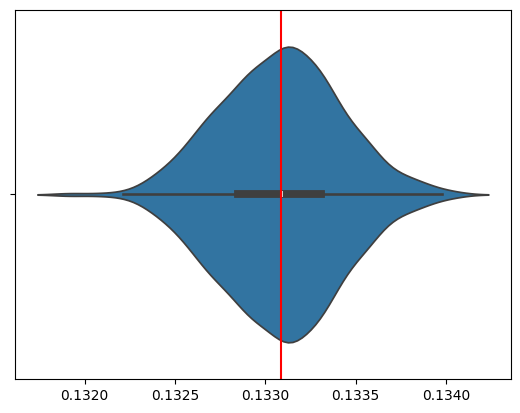

In [42]:
data_2 = get_prob_estimates(1000)
sns.violinplot(x=data_2)
plt.axvline(x=analitical_prob, color="r")

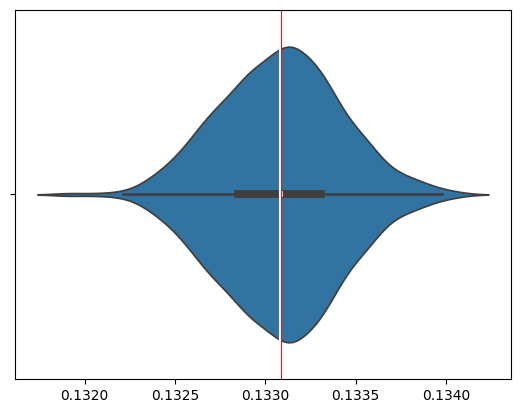

In [43]:
sns.violinplot(x=data_2)
plt.axvline(x=analitical_prob, color="r")
plt.axvline(x=np.mean(data_2), color="w")

# Вариант 1 задача 1

In [2]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

mean = 10
exp_lambda = 1 / mean
s = 10

conditional_mean = (1 / exp_lambda - np.exp(-exp_lambda * s) * (1 / exp_lambda + s)) / (
    1 - np.exp(-exp_lambda * s)
)
eta_mean = np.exp(exp_lambda * s) - 1
analitical_mean = conditional_mean * eta_mean
analitical_mean

7.182818284590451

In [3]:
def get_mean_estimates(N):
    rnd = np.random.default_rng(seed=0)
    means = []
    for _ in tqdm(range(N)):
        xi_s = [0]
        while True:
            xi = rnd.exponential(scale=mean, size=1)[0]
            if xi >= s:
                break
            xi_s.append(xi)
        means.append(np.sum(xi_s))
    return means

100%|██████████| 100/100 [00:00<00:00, 45138.87it/s]

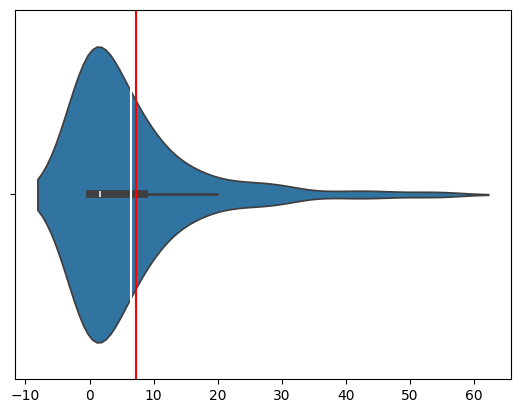

In [4]:
mean_data = get_mean_estimates(100)

sns.violinplot(x=mean_data)
plt.axvline(x=analitical_mean, color="r")
plt.axvline(x=np.mean(mean_data), color="w")

100%|██████████| 10000/10000 [00:00<00:00, 147255.36it/s]


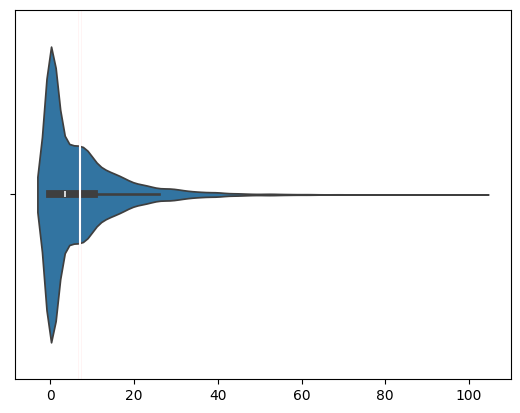

In [7]:
mean_data = get_mean_estimates(10000)

sns.violinplot(x=mean_data)
plt.axvline(x=analitical_mean, color="r")
plt.axvline(x=np.mean(mean_data), color="w")

In [8]:
np.mean(mean_data), analitical_mean

(7.137679723736679, 7.182818284590451)